**Much of the theory behind this code was learned from Coursera.com**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

The cost function is fairly standard for most regressions <br>
**We take the summation of every error squared, and divide it by m to make sure the cost is scaled appropriately with the sample size**<br>
**The 1/2 value is just used so that when taking the derivative, it will be cancelled out**<br>

**As the name suggests, the cost derivative takes the derivative of the cost function, essentially producing a negative gradient**

In [2]:
# computes the error of any given predicted value
def cost(predicted, actual):
    return (1 / (2 * m)) * np.sum(np.square(predicted - actual))

In [3]:
# finds the gradients/derivatives for any given predicted value
def cost_derivative(predicted, actual, input_values):
    return (1 / m) * (input_values.T @ (predicted - actual))

<h3>
    Gradient descent visualization for simple regression
</h3>

<h5>
    <u>Visualizing the cost function with respect to the intercept</u>
</h5>

###### We will be graphing a linear equation in the form: <br>**y = $\theta$<sub>0</sub> + $\theta$<sub>1</sub>x**<br><br>In this case, $\theta$<sub>0</sub> = -2 and $\theta$<sub>1</sub> = 4

In [4]:
lin_reg_x = np.matrix("1;3;4;8;-2")
lin_reg_y = 4 * lin_reg_x - 2

lin_reg_x = np.append(np.ones([len(lin_reg_x),1]), lin_reg_x, 1)

m = len(lin_reg_y)

In [5]:
theta0_plot_x = np.linspace(-6, 2, 100)
theta0_plot_y = [];

# to visualize the cost function for the intercept, we will assume the slope is at the correct value
for theta0 in theta0_plot_x:
    temp_thetas = np.matrix([theta0, 4]).T
    theta0_plot_y.append(cost(lin_reg_x @ temp_thetas, lin_reg_y))

As you can see, the minimum cost value is achieved when $\theta$<sub>0</sub> = -2, which is what we expect to happen

Text(0, 0.5, 'Cost')

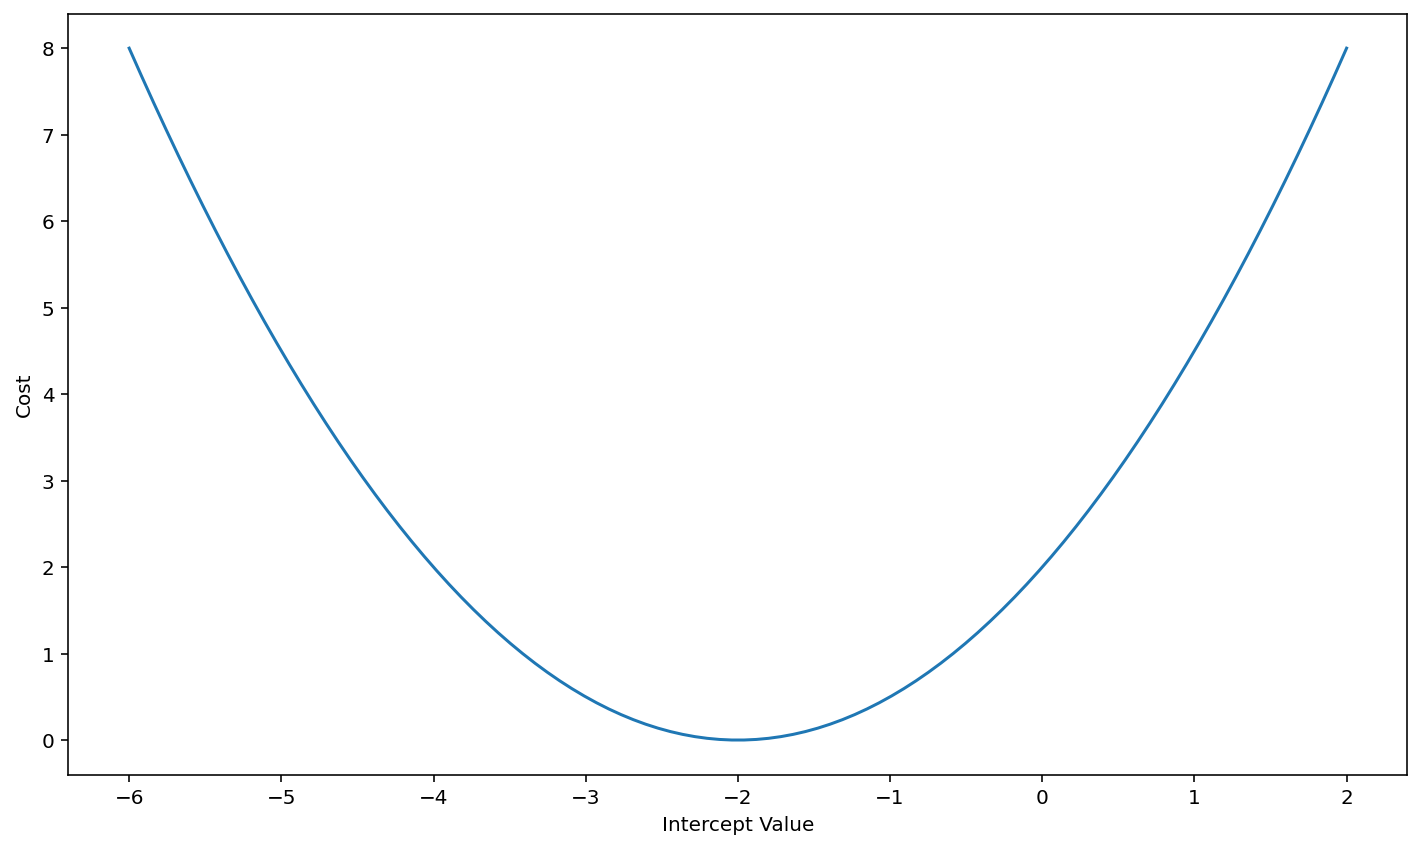

In [6]:
# 2-D visualization of the cost function of the intercept
plt.plot(theta0_plot_x, theta0_plot_y)

plt.xlabel('Intercept Value')
plt.ylabel('Cost')

In [7]:
# start intercept at 1.5 for demonstration
lin_reg_thetas = np.matrix("1.5;4")
num_iterations = 1000
learning_rate = 0.1

grad_descent_x_intercept = []
grad_descent_y_intercept = []

In [8]:
# gradient descent
for iteration in range(num_iterations):
    predicted_y = lin_reg_x @ lin_reg_thetas
    # assign the gradient x and y values
    grad_descent_x_intercept.append(lin_reg_thetas.item(0, 0))
    grad_descent_y_intercept.append(cost(predicted_y, lin_reg_y))
    #continue gradient descent
    lin_reg_thetas = lin_reg_thetas - learning_rate * cost_derivative(predicted_y, lin_reg_y, lin_reg_x)

###### Each orange line segment is a visual reprsentation of the gradient vector for every iteration
###### Over time, the segments become shorter and shorter, as the gradient "travels down" the cost function to reach the global minimum

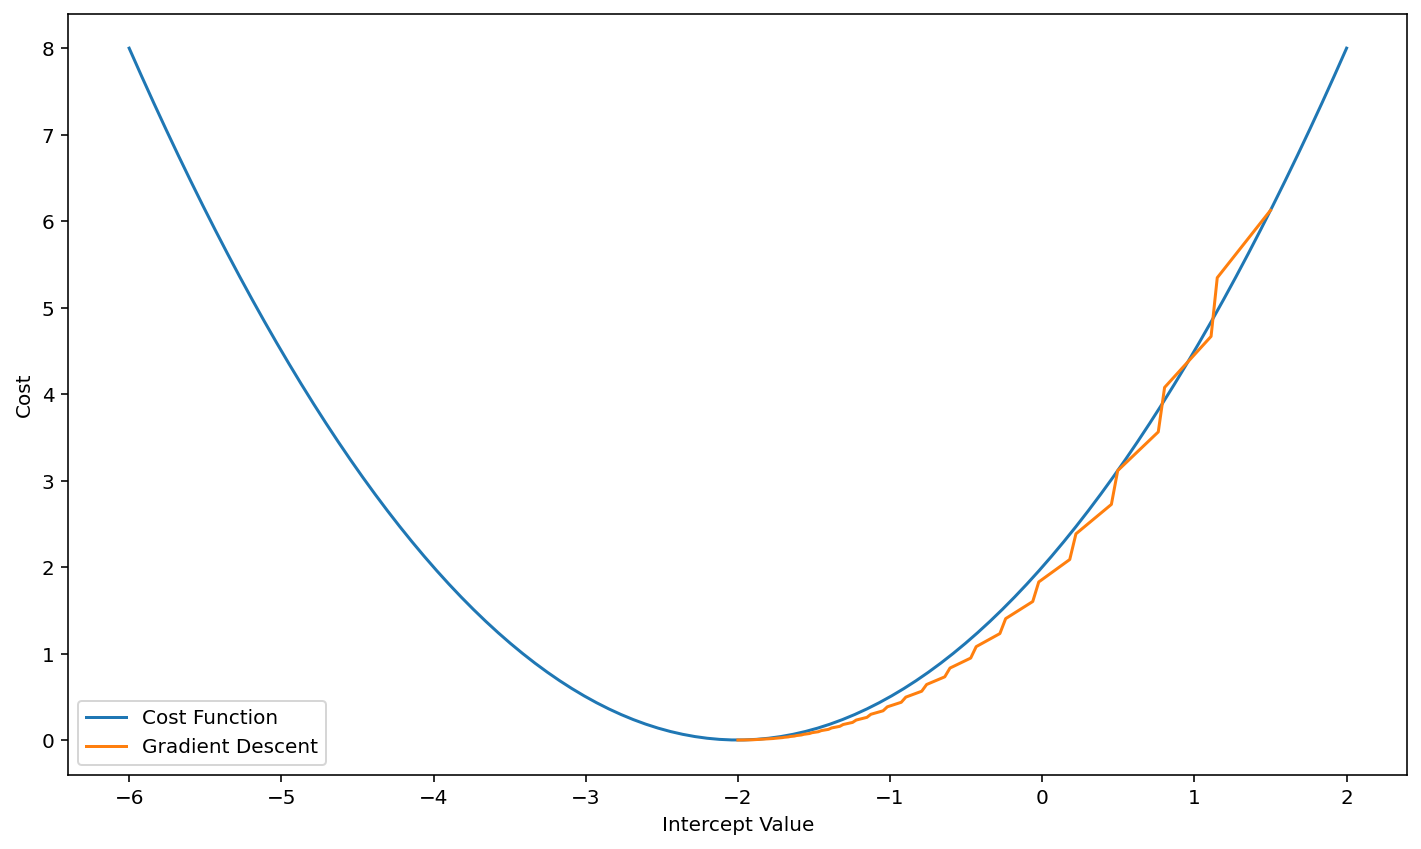

In [9]:
plt.plot(theta0_plot_x, theta0_plot_y, label = "Cost Function")
plt.plot(grad_descent_x_intercept, grad_descent_y_intercept, label = "Gradient Descent")

plt.xlabel('Intercept Value')
plt.ylabel('Cost')

plt.legend()

<h5>
    <u>Visualizing the cost function with respect to the slope</u>
</h5>

In [10]:
# graphing with the line y = 4x - 2
lin_reg_x = np.matrix("1;3;4;8;-2")
lin_reg_y = 4 * lin_reg_x - 2

lin_reg_x = np.append(np.ones([len(lin_reg_x),1]), lin_reg_x, 1)

m = len(lin_reg_y)

In [11]:
theta1_plot_x = np.linspace(0, 8, 100)
theta1_plot_y = [];

# to visualize the cost function for the slope, we will assume the intercept is at the correct value
for theta1 in theta1_plot_x:
    temp_thetas = np.matrix([-2, theta1]).T
    theta1_plot_y.append(cost(lin_reg_x @ temp_thetas, lin_reg_y))

###### Similarly, the global minimum for the cost function of the slope is at the expected slope value, $\theta$<sub>1</sub> = 4

Text(0, 0.5, 'Cost')

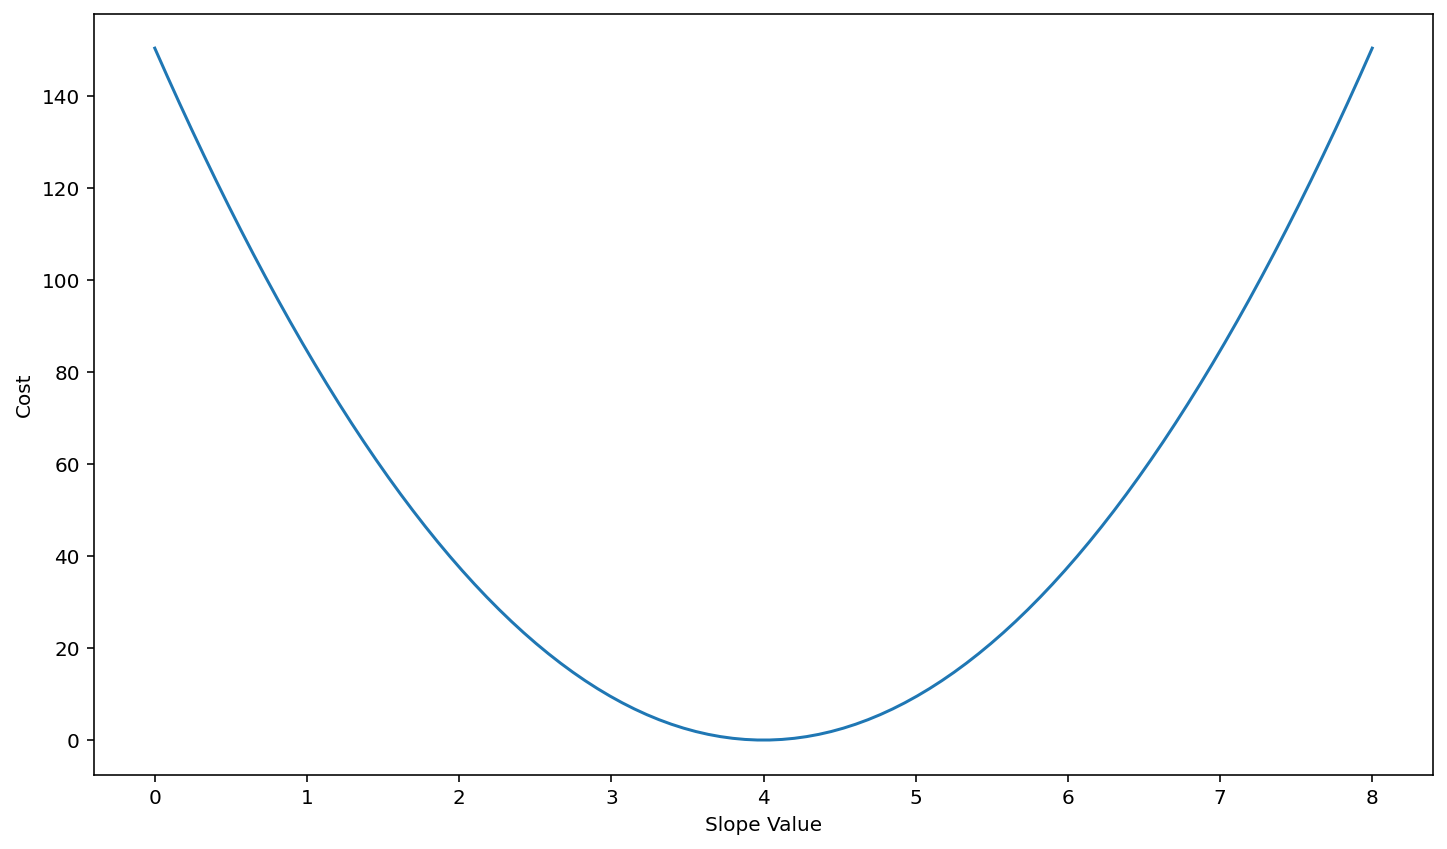

In [12]:
# 2-D visualization of the cost function of the slope
plt.plot(theta1_plot_x, theta1_plot_y)

plt.xlabel('Slope Value')
plt.ylabel('Cost')

In [13]:
# start slope at 0.5 for demonstration
lin_reg_thetas = np.matrix("-2;0.5")
num_iterations = 1000
learning_rate = 0.1

grad_descent_x_slope = []
grad_descent_y_slope = []

In [14]:
# gradient descent
for iteration in range(num_iterations):
    predicted_y = lin_reg_x @ lin_reg_thetas
    # assign the gradient x and y values
    grad_descent_x_slope.append(lin_reg_thetas.item(1, 0))
    grad_descent_y_slope.append(cost(predicted_y, lin_reg_y))
    # continue gradient descent
    lin_reg_thetas = lin_reg_thetas - learning_rate * cost_derivative(predicted_y, lin_reg_y, lin_reg_x)

###### The gradient descent direction can even vary depending on the initial value
###### Notice how in this example, the gradient vectors alternate between the halves of the graph

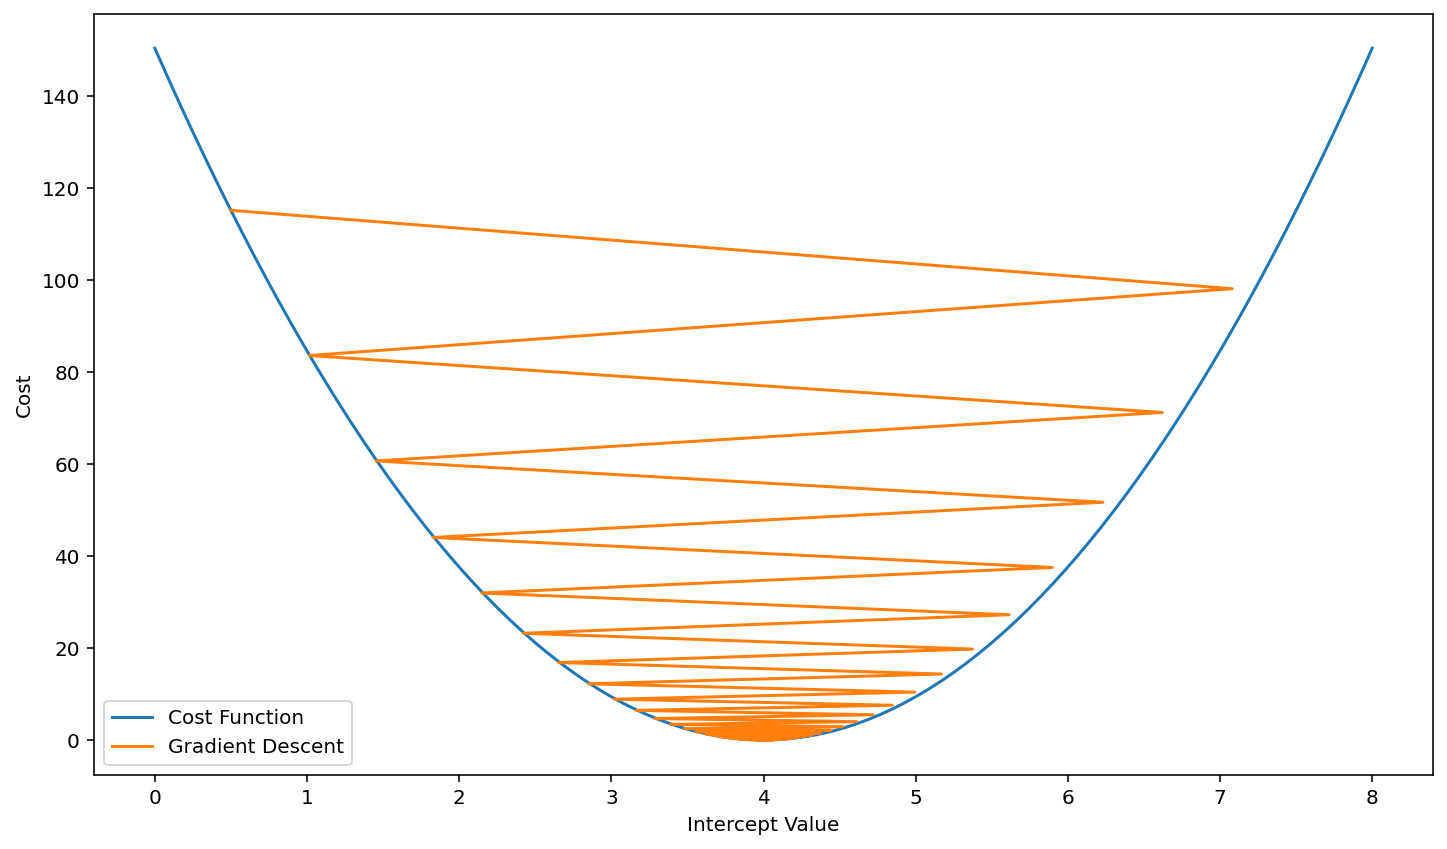

In [15]:
plt.plot(theta1_plot_x, theta1_plot_y, label = "Cost Function")
plt.plot(grad_descent_x_slope, grad_descent_y_slope, label = "Gradient Descent")

plt.xlabel('Intercept Value')
plt.ylabel('Cost')

plt.legend()

<h5>
    <u>Graphing the cost function in 3 dimensions</u>
</h5>

In [16]:
# initialize x and y values
theta0_3d = np.linspace(-6, 2, 81)
theta1_3d = np.linspace(0, 8, 81)
cost_3d = []

In [17]:
# get the z (cost) value for every combination of points
for theta0 in theta0_3d:
    for theta1 in theta1_3d:
        theta_vector = np.matrix([theta0, theta1]).T
        predicted_y = lin_reg_x @ theta_vector
        cost_3d.append(cost(predicted_y, lin_reg_y))

###### When analyzing the cost function for multiple variables, the dimension of the cost function will be n + 1, where n is the number of thetas (including the intercept)
###### In the 3D contour plot, you can see that the minimum cost value <u>(the red dot)</u> is when the intercept is -2 and the slope is 4

Text(0.5, 0, 'Cost')

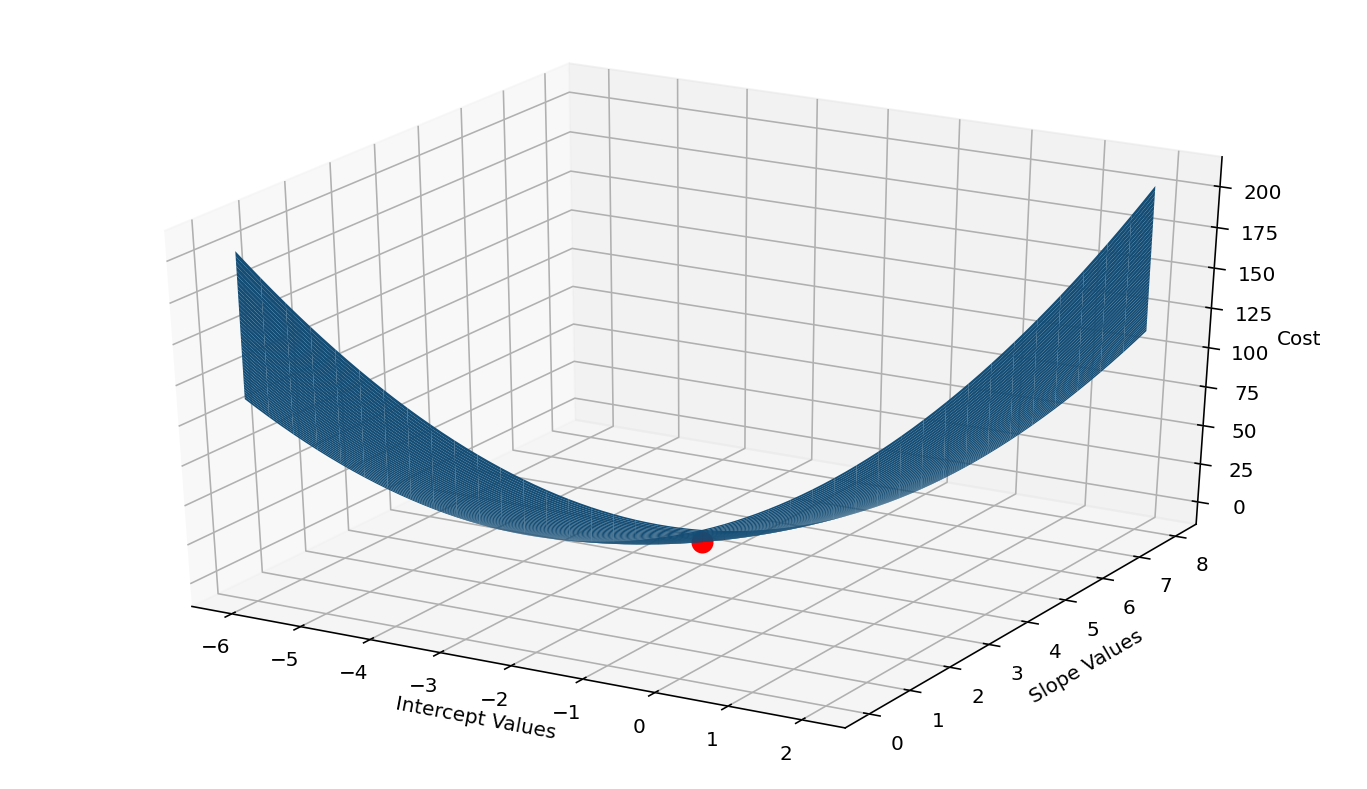

In [18]:
# plots the 3-D cost function
fig = plt.figure()
ax = plt.axes(projection="3d")

cost_3d = np.matrix(cost_3d).reshape(81, 81)

ax.scatter([-2], [4], [0], color="r", s=100)
ax.plot_surface(theta0_3d, theta1_3d, np.array(cost_3d))

ax.set_xlabel('Intercept Values')
ax.set_ylabel('Slope Values')
ax.set_zlabel('Cost')

<h3>
    Multilinear regression using machine learning
</h3>

###### We will be graphing a linear equation in the form: <br>**y = $\theta$<sub>0</sub> + $\theta$<sub>1</sub>x + $\theta$<sub>2</sub> + $\theta$<sub>3</sub>x**<br>

In this case, $\theta$<sub>0</sub> = -3, $\theta$<sub>1</sub> = 4, $\theta$<sub>0</sub> = 2 and $\theta$<sub>1</sub> = -3

In [19]:
# training data, Equation: (-3 + 4x1 + 2x2 - x3)
    x_values = np.matrix("2 3 5;-2 -2 1;0 4 -3;1 1 1;0 1 2")
    y_values = x_values @ np.matrix("4;2;-1") - 3

In [20]:
# create the slopes and intercept vector
thetas = np.matrix(np.zeros(4)).T

# appends ones to the vectors for the intercept value
x = np.append(np.ones([len(x_values),1]), x_values, 1)

In [21]:
# defined constants
m = len(x)
learning_rate = 0.1
num_iterations = 1000;

###### In the method of gradient descent, a large number of iterations is completed
###### During each iteration, a predicted value is calculated, and the thetas are adjusted by a constant (<u>the learning rate</u>) times the derivative of the cost function for those predicted y values

In [22]:
# gradient descent
for iteration in range(num_iterations):
    predicted_y = x @ thetas
    thetas = thetas - learning_rate * cost_derivative(predicted_y, y_values, x)

###### As you can see, the predicted y values and thetas are essentially the same as what we expected,with a very low cost function

In [23]:
print("Predicted Y Values:")
print(predicted_y)
print()
print("Predicted Thetas:")
print(thetas)
print()
print("Cost of predicted values:")
print(cost(predicted_y, y_values))

Predicted Y Values:
[[  5.9999997 ]
 [-16.        ]
 [  7.99999988]
 [  2.00000117]
 [ -3.0000001 ]]

Predicted Thetas:
[[-2.99999891]
 [ 4.00000093]
 [ 1.99999945]
 [-1.00000032]]

Cost of predicted values:
1.4808942353392364e-13


<h3>
    Line of best fit comparisons to normal equation
</h3>

In [24]:
# initialize a random data set
random_x = np.random.random(50) * 10 - 5
random_y = random_x * (np.random.random(50) * 2 + 3) + np.random.random(50) * 2

x = np.append(np.ones([len(np.matrix(random_x).T),1]), np.matrix(random_x).T, 1)

best_fit_thetas = np.matrix(np.random.random(2)).T

In [25]:
# initialize constants to be used
learning_rate = 0.1
m = len(random_x)
num_iterations = 100;

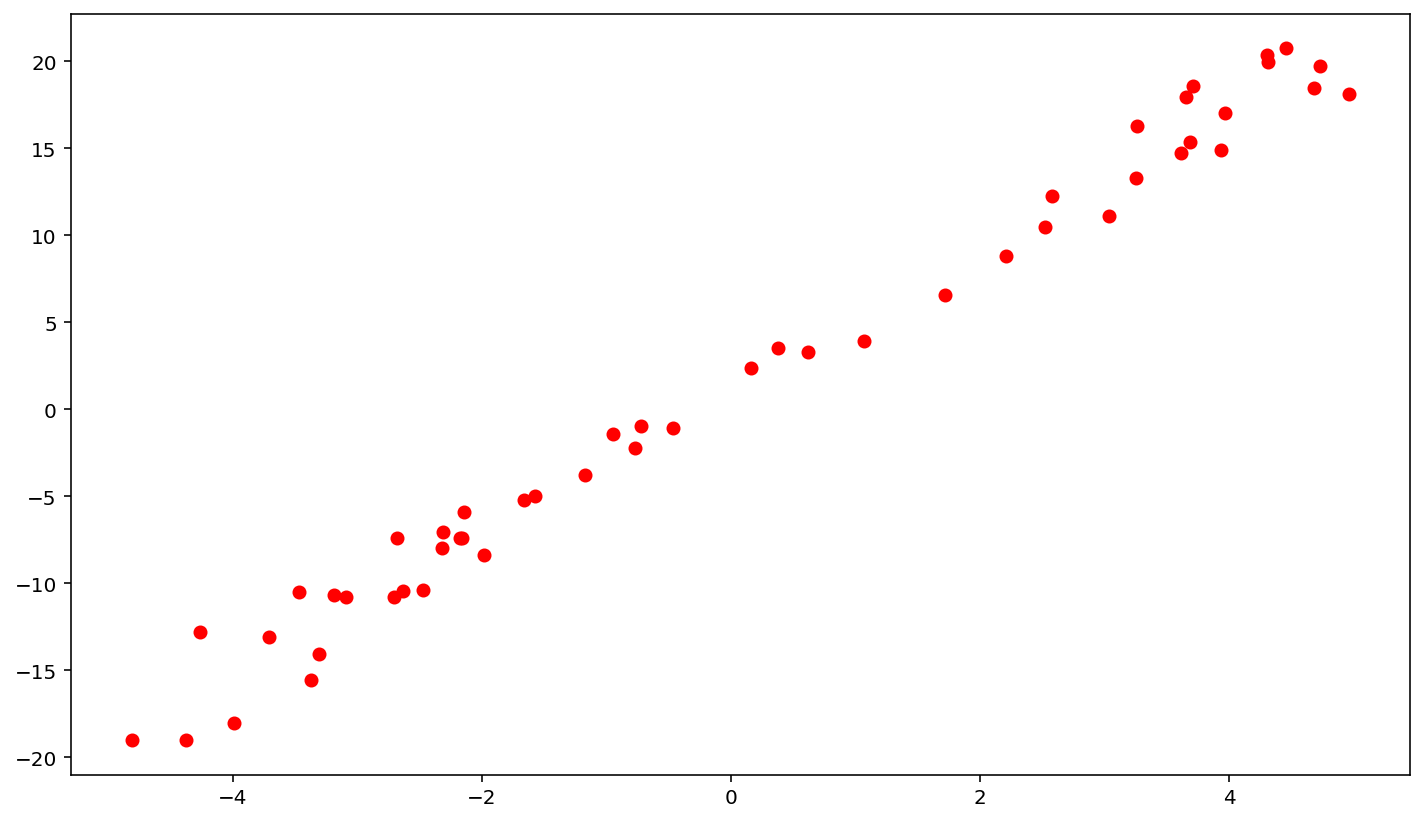

In [26]:
# plot the points
plt.plot(random_x, random_y, 'ro')

<h5>
    <u>Method of Gradient Descent (better for larger sets of data due to converging O(n^2) runtime)</u>
</h5>

In [27]:
# gradient descent for line of best fit
for iteration in range(num_iterations):
    predicted_y = x @ best_fit_thetas
    best_fit_thetas = best_fit_thetas - learning_rate * cost_derivative(predicted_y, np.matrix(random_y).T, x)

Text(1, -10, 'Cost: 1.2010918411')

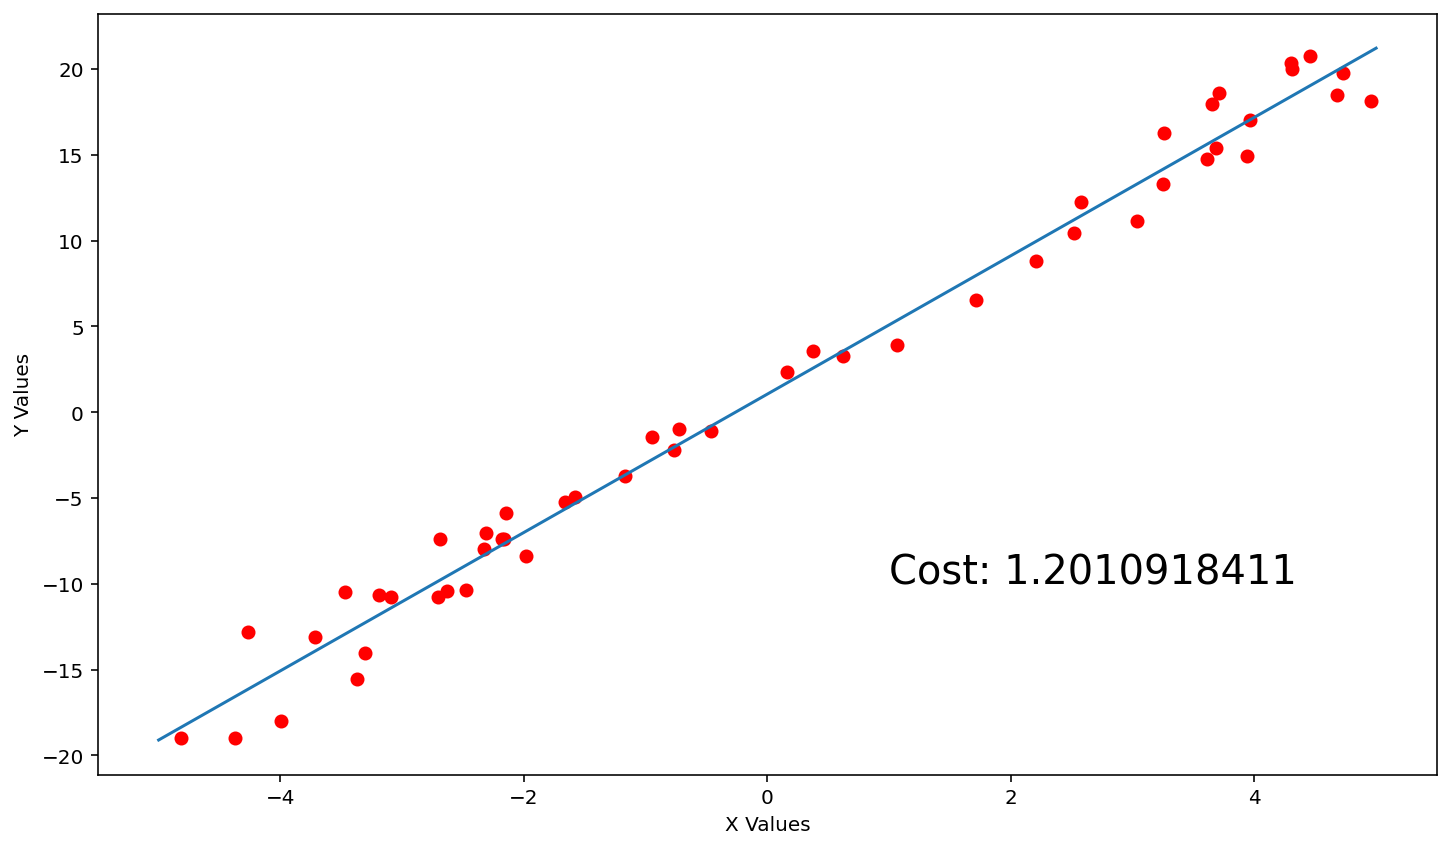

In [28]:
# plot the points with a line of best fit
plt.plot(random_x, random_y, 'ro')
plt.xlabel('X Values')
plt.ylabel("Y Values")
plt.plot([-5, 5], [best_fit_thetas[0, 0] - 5 * best_fit_thetas[1, 0], best_fit_thetas[0, 0] + 5 * best_fit_thetas[1, 0]])
plt.text(1, -10, ("Cost: " + str(round(cost(predicted_y, np.matrix(random_y).T), 10))), fontsize = 20)

<h5><u>Method of Normal Equation (better for smaller sets of data due to converging O(n^3) runtime)</u></h5>
<h5>The line of best fit can also be written as: $\theta$ = (X<sup>T</sup> * X)<sup>-1</sup> * (X<sup>T</sup> * y)</h5>
<u>(where theta is the vector of intercept and slope values)</u>

In [29]:
# calculate the appropriate theta values
best_fit_thetas = (np.linalg.inv(x.T @ x)) @ (x.T @ np.matrix(random_y).T)

Text(1, -10, 'Cost: 1.2010918409')

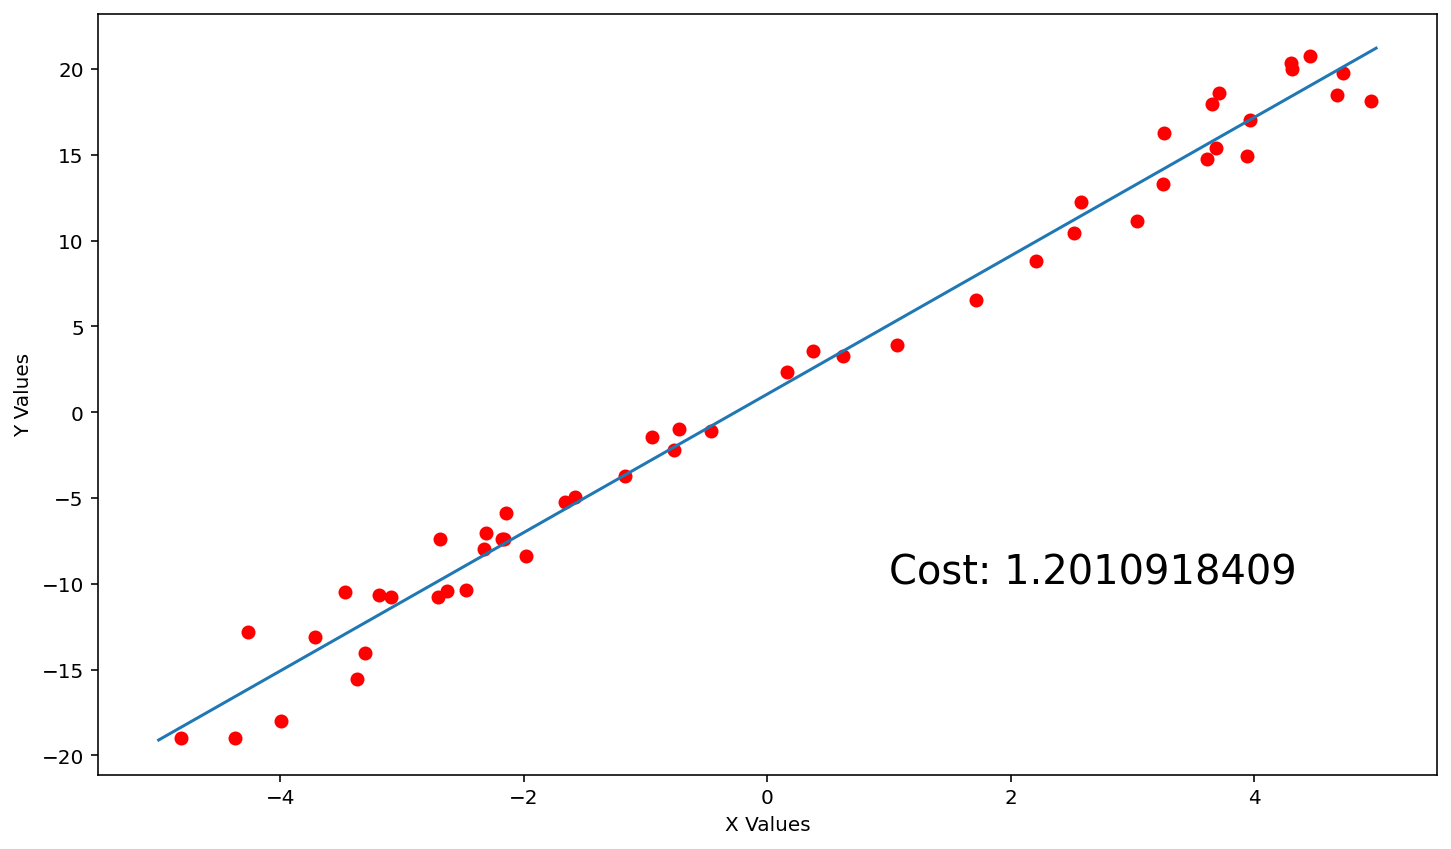

In [30]:
# plot the points with a line of best fit
plt.plot(random_x, random_y, 'ro')
plt.xlabel('X Values')
plt.ylabel("Y Values")
plt.plot([-5, 5], [best_fit_thetas[0, 0] - 5 * best_fit_thetas[1, 0], best_fit_thetas[0, 0] + 5 * best_fit_thetas[1, 0]])
plt.text(1, -10, ("Cost: " + str(round(cost(x @ best_fit_thetas, np.matrix(random_y).T), 10))), fontsize = 20)

###### As you can see, the methods of gradient descent and normal equations produce the same output
###### However, for larger sets of data, gradient descent is the better method
###### This is because computing the inverse of a matrix is very expensive compared to the calculations done in gradient descent

<u></u>